___
# Diabetes Prediction and Analysis

## INFO 411

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
##Before we get started wiht the model ive noticed that there are some invalid inputs 
##such as BMI = 0, BloodPressure = 0 so we need to remove these entries to keep the data clean

In [7]:
diabetes[diabetes['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [8]:
diabetes[diabetes['BloodPressure'] < 24]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
diabetes_filtered = diabetes

In [11]:
diabetes_filtered.drop(diabetes_filtered[diabetes.BMI == 0].index, inplace=True)

In [12]:
diabetes_filtered.drop(diabetes_filtered[diabetes.BloodPressure == 0].index, inplace=True)

In [13]:
diabetes_filtered.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.858711,121.046639,72.367627,21.499314,83.946502,32.469959,0.474117,33.318244,0.344307
std,3.357468,32.255215,12.375838,15.708376,116.803000,6.885098,0.331649,11.753078,0.475468
min,0.000000,0.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,46.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
##I removed the entries where Blood Pressure and BMI = 0 since its not possible

# EDA

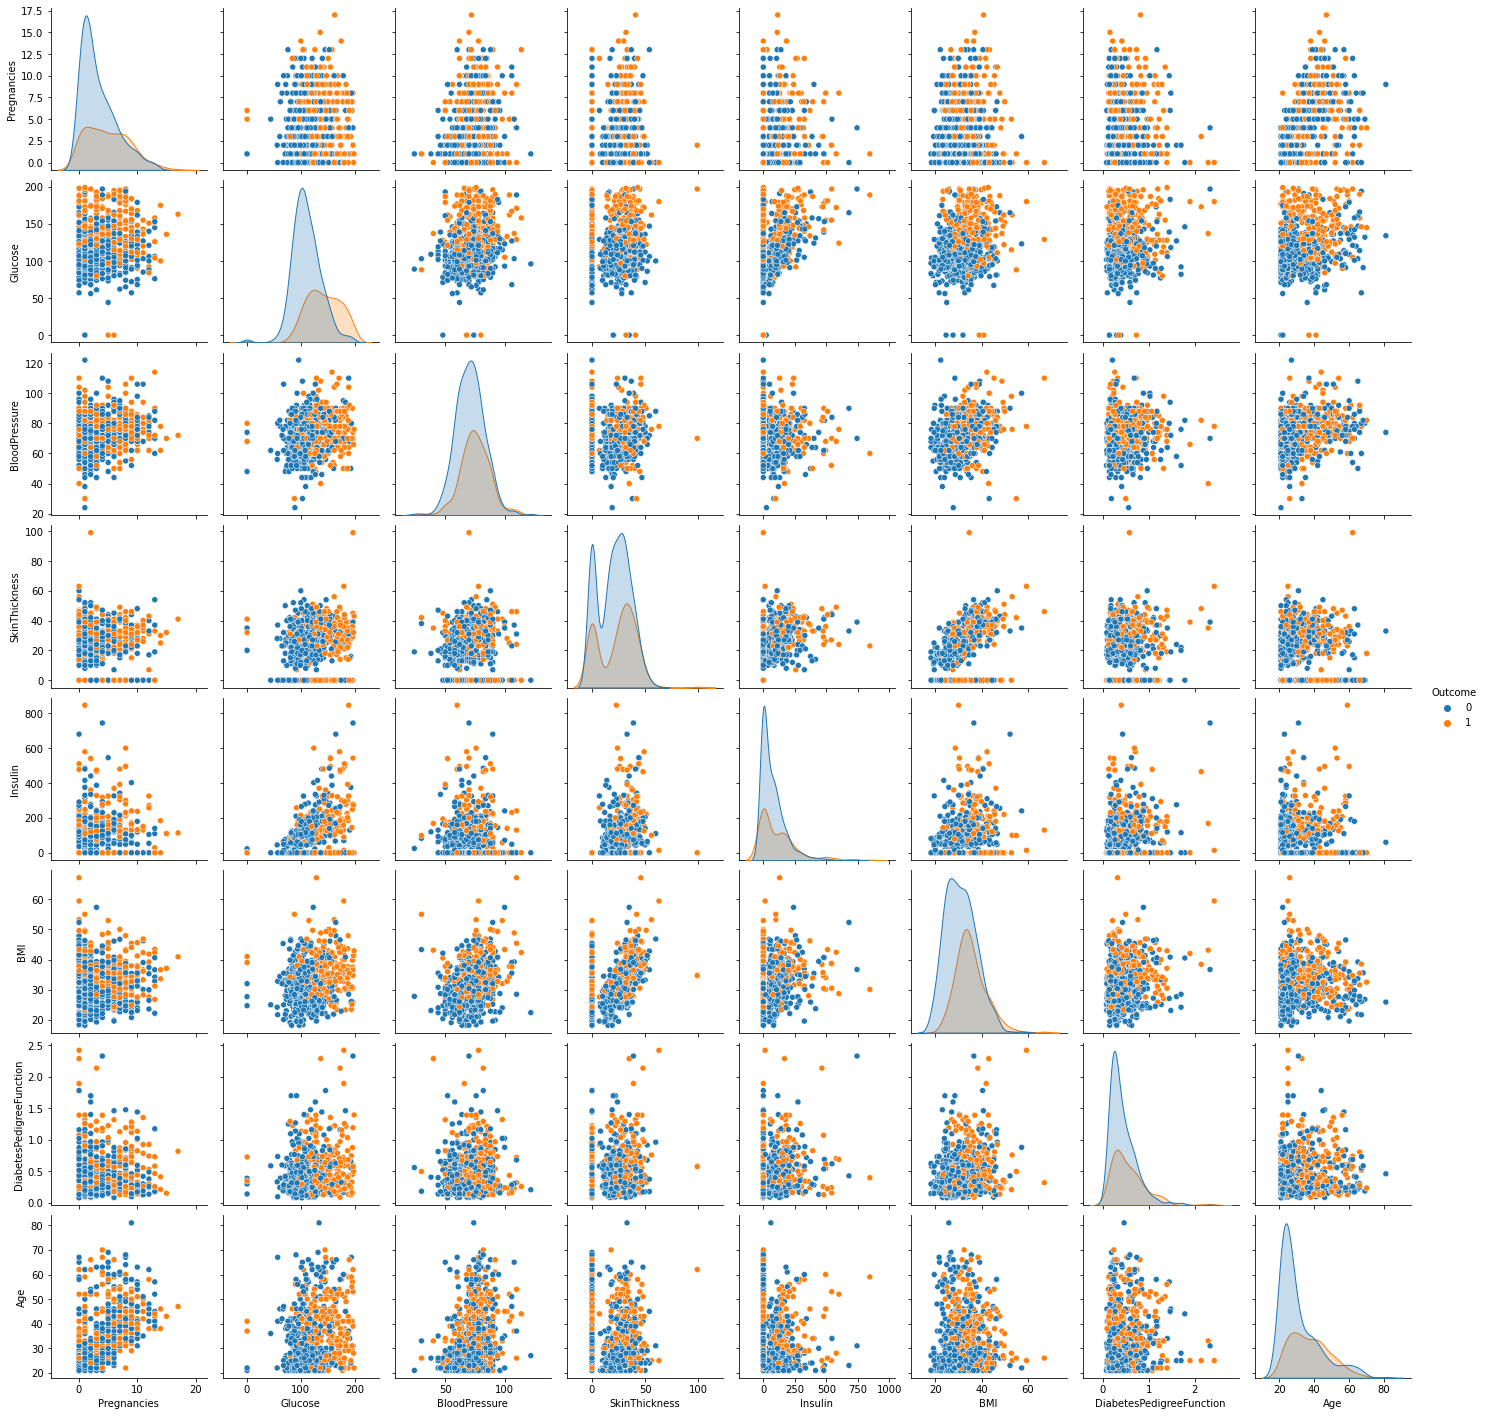

In [16]:
sns.pairplot(diabetes_filtered,hue='Outcome')

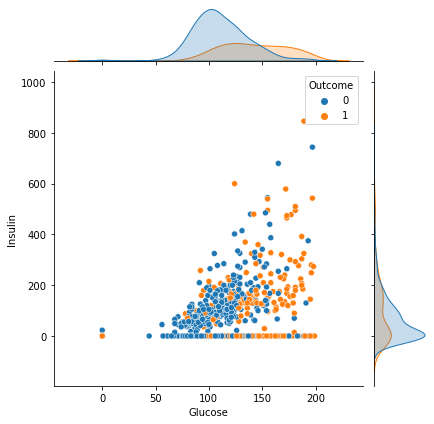

In [24]:
sns.jointplot(data=diabetes_filtered, x="Glucose", y="Insulin", hue="Outcome")

In [ ]:
##This graoh shows that when insulin is low or glucose is high means its more likely to be diabetic which follows the same
##logic that diabetes interferes with the production and use of insulin

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
X = diabetes_filtered[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_filtered['Outcome']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
logModel = LogisticRegression(max_iter=10000)

In [56]:
logModel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [112]:
logisticPrediction = logModel.predict(X_test)

In [113]:
print(confusion_matrix(y_test, logisticPrediction))

[[124  14]
 [ 35  46]]


In [114]:
print(classification_report(y_test, logisticPrediction))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       138
           1       0.77      0.57      0.65        81

    accuracy                           0.78       219
   macro avg       0.77      0.73      0.74       219
weighted avg       0.77      0.78      0.77       219



## KNN

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [64]:
scaler.fit(diabetes_filtered.drop('Outcome',axis=1))

StandardScaler()

In [65]:
scaled_features = scaler.transform(diabetes_filtered.drop('Outcome',axis=1))

In [66]:
scaled_features

array([[ 6.38206980e-01,  8.36201712e-01, -2.97256063e-02, ...,
         1.64241233e-01,  4.61296120e-01,  1.42032657e+00],
       [-8.52032893e-01, -1.11831180e+00, -5.14874121e-01, ...,
        -8.53145281e-01, -3.71480542e-01, -1.97381129e-01],
       [ 1.23430293e+00,  1.92204255e+00, -6.76590293e-01, ...,
        -1.33277035e+00,  5.97074924e-01, -1.12238618e-01],
       ...,
       [ 3.40159005e-01, -1.44693665e-03, -2.97256063e-02, ...,
        -9.11281653e-01, -6.91315057e-01, -2.82523639e-01],
       [-8.52032893e-01,  1.53673183e-01, -1.00002264e+00, ...,
        -3.44452024e-01, -3.77515155e-01,  1.16489904e+00],
       [-8.52032893e-01, -8.70119609e-01, -1.91441778e-01, ...,
        -3.00849745e-01, -4.80103585e-01, -8.78521213e-01]])

In [67]:
df_feat = pd.DataFrame(scaled_features,columns=diabetes_filtered.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638207,0.836202,-0.029726,0.860048,-0.719195,0.164241,0.461296,1.420327
1,-0.852033,-1.118312,-0.514874,0.477824,-0.719195,-0.853145,-0.371481,-0.197381
2,1.234303,1.922043,-0.676590,-1.369593,-0.719195,-1.332770,0.597075,-0.112239
3,-0.852033,-0.994216,-0.514874,0.095600,0.086131,-0.635134,-0.926665,-1.048806
4,-1.150081,0.494937,-2.617184,0.860048,0.720112,1.544980,5.473043,-0.027096


In [69]:
X_trainKnn,X_testKnn,y_trainKnn,y_testKnn = train_test_split(scaled_features,diabetes_filtered['Outcome'],test_size=0.3)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.fit(X_trainKnn,y_trainKnn)

KNeighborsClassifier(n_neighbors=1)

In [74]:
KnnPrediction = knn.predict(X_testKnn)
KnnPrediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [75]:
print(confusion_matrix(y_testKnn,KnnPrediction))

[[113  33]
 [ 33  40]]


In [76]:
print(classification_report(y_testKnn,KnnPrediction))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       146
           1       0.55      0.55      0.55        73

    accuracy                           0.70       219
   macro avg       0.66      0.66      0.66       219
weighted avg       0.70      0.70      0.70       219



In [ ]:
##this classification report was made by predicting with K=1 which may not be the bes K value so we then print a table showing
## all the Kvalues and their error rate

In [78]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainKnn,y_trainKnn)
    pred_i = knn.predict(X_testKnn)
    error_rate.append(np.mean(pred_i != y_testKnn))

Text(0, 0.5, 'Error Rate')

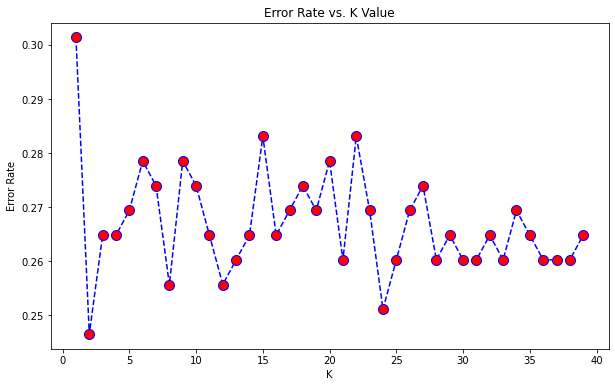

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_trainKnn,y_trainKnn)
KnnPrediction = knn.predict(X_testKnn)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_testKnn,KnnPrediction))
print('\n')
print(classification_report(y_testKnn,KnnPrediction))

WITH K=11


[[136  10]
 [ 44  29]]


              precision    recall  f1-score   support

           0       0.76      0.93      0.83       146
           1       0.74      0.40      0.52        73

    accuracy                           0.75       219
   macro avg       0.75      0.66      0.68       219
weighted avg       0.75      0.75      0.73       219



In [ ]:
## The graph showed that when K=2 the error rate was the least so this new report is showing the accuracy when the precictions
## were made with a K value of 2 which incresed the accuracy by 5%

## Decision Tree

In [81]:
X_trainDTree, X_testDTree, y_trainDTree, y_testDTree = train_test_split(X,y, test_size=0.30)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier()

In [84]:
dtree.fit(X_trainDTree,y_trainDTree)

DecisionTreeClassifier()

In [86]:
dTreePredictions = dtree.predict(X_testDTree)

In [87]:
print(confusion_matrix(y_testDTree,dTreePredictions))

[[121  31]
 [ 21  46]]


In [88]:
print(classification_report(y_testDTree,dTreePredictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       152
           1       0.60      0.69      0.64        67

    accuracy                           0.76       219
   macro avg       0.72      0.74      0.73       219
weighted avg       0.77      0.76      0.77       219



## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_trainDTree, y_trainDTree)

RandomForestClassifier()

In [ ]:
## number of estimators basically shows the number of decision trees in our random  forest

In [91]:
rfc_pred = rfc.predict(X_testDTree)

In [92]:
print(confusion_matrix(y_testDTree,rfc_pred))

[[131  21]
 [ 28  39]]


In [93]:
print(classification_report(y_testDTree,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       152
           1       0.65      0.58      0.61        67

    accuracy                           0.78       219
   macro avg       0.74      0.72      0.73       219
weighted avg       0.77      0.78      0.77       219



## SVM

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
from sklearn.svm import SVC

In [98]:
model = SVC()

In [99]:
model.fit(X_train,y_train)

SVC()

In [100]:
svmPredictions = model.predict(X_test)

In [101]:
print(confusion_matrix(y_test,svmPredictions))

[[127  11]
 [ 43  38]]


In [102]:
print(classification_report(y_test,svmPredictions))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       138
           1       0.78      0.47      0.58        81

    accuracy                           0.75       219
   macro avg       0.76      0.69      0.70       219
weighted avg       0.76      0.75      0.74       219



This classification report shows the accuracy when using the default parameters of SVM we will then use gridsearch to find the bst parameters and tun it again with them

# Gridsearch

In [104]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [ ]:
##giving the gridsearch the parameter which should be tried

In [105]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [106]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.667 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 4/5] END .................C=1000, gamma=0.1;, score=0.667 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.657 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.696 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.627 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.608 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.647 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.657 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.657 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.657 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.627 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.637 total time=   0.0s
[CV 1/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [107]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [108]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [109]:
grid_predictions = grid.predict(X_test)

In [110]:
print(confusion_matrix(y_test,grid_predictions))

[[124  14]
 [ 43  38]]


In [111]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       138
           1       0.73      0.47      0.57        81

    accuracy                           0.74       219
   macro avg       0.74      0.68      0.69       219
weighted avg       0.74      0.74      0.72       219



This new classifiication report shows the accuracy after using the best parameters which were found using the gridsearch

Seeing that the accuracy is all around the same throught which shows that some of the models will perform better for this dataset but to increase accuracy further would require a better dataset with a better corelation between the data.

## Great Job!